# Covid-19 Vaccination Plan 2021

###### Problem 1

Open up a new IPython notebook

Download MTA turnstile data files for the following three dates: 160903, 160910, 160917

Load the files into a pandas DataFrame (hint: pd.read_csv() to load files and pd.concat() to combine DataFrames)

In [2]:
import pandas as pd

In [55]:
# Source: http://web.mta.info/developers/turnstile.html

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt" #url with formatting to fill in the number of the particular week
    dfs = []
    for week_num in week_nums: #for each weeka
        file_url = url.format(week_num) #format the url so it grabs that week
        dfs.append(pd.read_csv(file_url)) #append to our empty list
    return pd.concat(dfs) #combine files for each week
        
week_nums = [210515, 210508, 210501, 210424, 210417, 210410, 210403, 210327, 210320, 210313, 210306]
turnstiles_df = get_data(week_nums) #use this function to get a df with all of the data

In [56]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,00:00:00,REGULAR,7568196,2585862
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,04:00:00,REGULAR,7568207,2585868
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,08:00:00,REGULAR,7568213,2585880
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,12:00:00,REGULAR,7568245,2585920
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,16:00:00,REGULAR,7568357,2585940


In [57]:
turnstiles_df.shape

(2299530, 11)

In [58]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [59]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [60]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

02/27/2021    29985
02/28/2021    29763
03/01/2021    29868
03/02/2021    29803
03/03/2021    29871
              ...  
05/10/2021    29931
05/11/2021    29849
05/12/2021    29877
05/13/2021    29982
05/14/2021    29761
Name: DATE, Length: 77, dtype: int64

### Problem 2

- Let's turn this into a time series.

- Our pandas dataframe has columns called `Date` and `Time` (what datatype did pandas assign to these columns on import?). However, in python and pandas we can convert date and time information to _datetime_ objects, which allow us to do time-based operations

- Using either [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) in pandas or the [python datetime library](https://docs.python.org/2/library/datetime.html), combine the `Date` and `Time` columns into a single new column of the datetime datatype

In [61]:
import datetime
# from datetime import datetime as dt

In [62]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [63]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,00:00:00,REGULAR,7568196,2585862,2021-05-08 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,04:00:00,REGULAR,7568207,2585868,2021-05-08 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,08:00:00,REGULAR,7568213,2585880,2021-05-08 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,12:00:00,REGULAR,7568245,2585920,2021-05-08 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,16:00:00,REGULAR,7568357,2585940,2021-05-08 16:00:00


Alternatively, pandas is so good that it can even automatically parse datetimes as you load in data if you tell it to, as below.

In [64]:
'''
# Source: http://web.mta.info/developers/turnstile.html
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df_2 = get_data_parse_dt(week_nums)
# turnstiles_df_2.head()
'''

'\n# Source: http://web.mta.info/developers/turnstile.html\ndef get_data_parse_dt(week_nums):\n    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"\n    dfs = []\n    for week_num in week_nums:\n        file_url = url.format(week_num)\n        dfs.append(pd.read_csv(file_url, parse_dates=[[\'DATE\',\'TIME\']], keep_date_col=True))\n    return pd.concat(dfs)\n        \nweek_nums = [160903, 160910, 160917]\nturnstiles_df_2 = get_data_parse_dt(week_nums)\n# turnstiles_df_2.head()\n'

### Interlude: Duplicate Entries
Now let's run some diagnostics on the data and see approaches to cleaning before tackling problem 3

We can isolate specific turnstiles by creating boolean series masks, then using them to index into the dataframe:

In [65]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,00:00:00,REGULAR,7568196,2585862,2021-05-08 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,04:00:00,REGULAR,7568207,2585868,2021-05-08 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,08:00:00,REGULAR,7568213,2585880,2021-05-08 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,12:00:00,REGULAR,7568245,2585920,2021-05-08 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/08/2021,16:00:00,REGULAR,7568357,2585940,2021-05-08 16:00:00


In [66]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
202236,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/08/2021,00:00:00,REGULAR,15905488,3516560,2021-05-08 00:00:00
202237,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/08/2021,04:00:00,REGULAR,15905495,3516568,2021-05-08 04:00:00
202238,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/08/2021,08:00:00,REGULAR,15905629,3516582,2021-05-08 08:00:00
202239,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/08/2021,12:00:00,REGULAR,15905810,3516607,2021-05-08 12:00:00
202240,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/08/2021,16:00:00,REGULAR,15905998,3516654,2021-05-08 16:00:00


In [67]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
  .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
  .ENTRIES.count()
  .reset_index()
  .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
705025,N100,R252,00-00-00,HIGH ST,2021-03-09 07:00:00,2
194966,B024,R211,00-05-00,KINGS HWY,2021-05-04 08:00:00,2
194970,B024,R211,00-05-00,KINGS HWY,2021-05-05 00:00:00,2
957031,N329,R201,00-03-02,WOODHAVEN BLVD,2021-05-08 01:00:00,2
957032,N329,R201,00-03-02,WOODHAVEN BLVD,2021-05-08 05:00:00,2


In [68]:
# On 5/21, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "B024") & 
(turnstiles_df["UNIT"] == "R211") & 
(turnstiles_df["SCP"] == "00-05-00") & 
(turnstiles_df["STATION"] == "KINGS HWY") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2021, 5, 4).date()))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
17739,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/04/2021,00:00:00,REGULAR,262152,0,2021-05-04 00:00:00
17740,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/04/2021,00:00:00,RECOVR AUD,16,0,2021-05-04 00:00:00
17741,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/04/2021,04:00:00,REGULAR,262152,0,2021-05-04 04:00:00
17742,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/04/2021,08:00:00,REGULAR,262152,0,2021-05-04 08:00:00
17743,B024,R211,00-05-00,KINGS HWY,BQ,BMT,05/04/2021,08:00:00,RECOVR AUD,17,0,2021-05-04 08:00:00


Looks to be a incorrect AUD entry. May be we should just select the Regular One.

In [69]:
turnstiles_df.DESC.value_counts()

REGULAR       2290848
RECOVR AUD       8682
Name: DESC, dtype: int64

Since we are only interested in Entries, we might be OK.

In [70]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [71]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
 (turnstiles_df
    .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
    .ENTRIES.count()
    .reset_index()
    .sort_values("ENTRIES", ascending=False)).head()

IndentationError: unexpected indent (<ipython-input-71-94ec7b072742>, line 2)

No more duplicate Entries

In [72]:
turnstiles_df = turnstiles_df.drop(["DESC"], axis=1, errors="ignore")


In [73]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
209038,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,21:00:00,5554,548,2021-05-14 21:00:00
209037,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,17:00:00,5554,548,2021-05-14 17:00:00
209036,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,13:00:00,5554,548,2021-05-14 13:00:00
209035,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,09:00:00,5554,548,2021-05-14 09:00:00
209034,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/14/2021,05:00:00,5554,548,2021-05-14 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,7537501,2570582,2021-02-27 19:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,7537354,2570546,2021-02-27 15:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,7537285,2570500,2021-02-27 11:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,7537260,2570445,2021-02-27 07:00:00


### Problem 3a
- Each combination of `C/A`, `UNIT`, `SCP`, and `STATION` represents a unique turnstile. Take a look at one specific turnstile on a specific date. What does each row in the dataframe represent?
- Obtain the maximum `ENTRIES` value for each day, for each unique turnstile.

Let's take a look at a specific turnstile on a specific date.

Looks like each row represents a turnstile (identified by a combination of  the `C/A`, `UNIT`, `SCP`, and `STATION` columns) at a specific time -- approximately four hours apart. The `ENTRIES` column represents **cumulative entries** at that point in time.

In [74]:
turnstiles_df[(turnstiles_df["C/A"] == "A002") & 
 (turnstiles_df["UNIT"] == "R051") & 
 (turnstiles_df["SCP"] == "02-00-00") & 
 (turnstiles_df["STATION"] == "59 ST") &
 (turnstiles_df["DATE"] == "02/27/2021")]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,23:00:00,7537589,2570596,2021-02-27 23:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,7537501,2570582,2021-02-27 19:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,7537354,2570546,2021-02-27 15:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,7537285,2570500,2021-02-27 11:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,7537260,2570445,2021-02-27 07:00:00
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,7537255,2570434,2021-02-27 03:00:00


The maximum `ENTRIES` value would occur at the last reading of the day. Since rows are listed in descending order of time, we can grab the last reading of the day (located at the top of the group) using the `.first()` DataFrame method.

In [75]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [76]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,02/27/2021,7537589
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503


# MTA Analysis Part 2

In [77]:
import datetime

### Problem 3b
- Use the daily maximum `ENTRIES` calculations from Problem 3a. Recall that the `ENTRIES` column contains **cumulative entries** on each day. We would now like you to calculate **daily entries**, i.e. the number of new entries gained each day.
- *Hint:* Group the data by turnstile. Check out the `.shift()` (or `.diff()`) DataFrame methods for this purpose. *Ensure things make sense;* you *may* need to use the  `.apply()` method for abnormalities.

In [78]:
# turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
#                                                        .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
#                                                        .apply(lambda grp: grp.shift(1)))

turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .shift(1))

In [79]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,02/27/2021,7537589,NaN,NaN
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0


In [80]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
384474,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/10/2021,5554,05/09/2021,5554.0
384475,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/11/2021,5554,05/10/2021,5554.0
384476,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/12/2021,5554,05/11/2021,5554.0
384477,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/13/2021,5554,05/12/2021,5554.0
384478,TRAM2,R469,00-05-01,RIT-ROOSEVELT,05/14/2021,5554,05/13/2021,5554.0


In [81]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

**Gut check**. We should expect *positive* daily entries, and nothing drastically large.

In [82]:
(turnstiles_daily["ENTRIES"] - turnstiles_daily["PREV_ENTRIES"]).describe()

count    3.794350e+05
mean    -4.808390e+03
std      7.101278e+06
min     -1.604323e+09
25%      6.000000e+01
50%      2.160000e+02
75%      4.450000e+02
max      2.139011e+09
dtype: float64

A few things are happening:
- We have negative values.
- Some values are *way* too big (see the difference between the `max` and the `75%` percentile). 

We can address these all at once.

In [83]:
# How many rows are backwards?
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].shape

(3521, 8)

### Interlude: Reverse Entries

To try and investigate what is going on, we'll pick one of these turnstile-days (namely, the first one), and check the course of events.

In [84]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A002") & 
 (turnstiles_df["UNIT"] == "R051") & 
 (turnstiles_df["SCP"] == "02-00-00") & 
 (turnstiles_df["STATION"] == "59 ST") &
 (turnstiles_df["DATE_TIME"].dt.date == datetime.date(2021, 2, 27)))

In [92]:
# It's actually a good idea to plot this, if you could
backwards = turnstiles_df[mask].sort_values('DATE_TIME')[['DATE', 'TIME', 'ENTRIES', 'EXITS']]

In [93]:
backwards

,DATE,TIME,ENTRIES,EXITS
0,02/27/2021,03:00:00,7537255,2570434
1,02/27/2021,07:00:00,7537260,2570445
2,02/27/2021,11:00:00,7537285,2570500
3,02/27/2021,15:00:00,7537354,2570546
4,02/27/2021,19:00:00,7537501,2570582
5,02/27/2021,23:00:00,7537589,2570596


It looks like the counter is working in reverse for ENTRIES and EXITS.

In [95]:
from matplotlib import pyplot as plt
import seaborn as sns

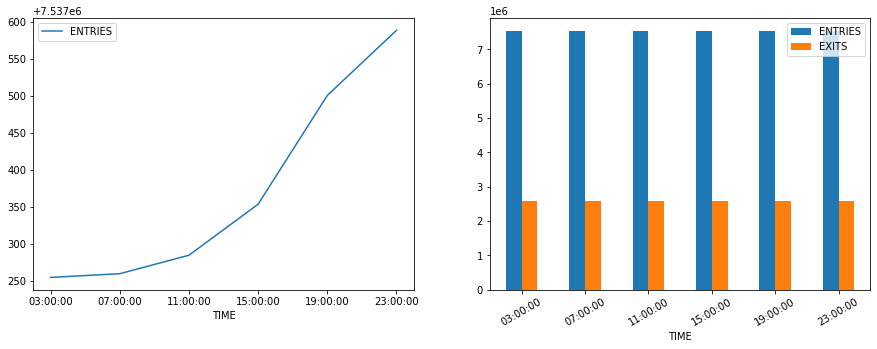

In [98]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
backwards.plot(x='TIME', y='ENTRIES', ax=axes[0])
backwards.plot(x='TIME', y=['ENTRIES','EXITS'],kind='bar', stacked=False,alpha=1,ax=axes[1])
plt.xticks(rotation = 30, horizontalalignment = 'center');

In [86]:
# Let's see how many stations have this problem
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
     .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A   UNIT  SCP       STATION        
A002  R051  02-03-02  59 ST               1
A011  R080  01-03-00  57 ST-7 AV         76
            01-03-03  57 ST-7 AV          1
            01-03-04  57 ST-7 AV          1
A025  R023  01-06-00  34 ST-HERALD SQ     1
                                         ..
R617  R058  00-00-02  BERGEN ST           1
R622  R123  00-00-00  FRANKLIN AV        75
R624  R124  00-00-02  KINGSTON AV         1
R730  R431  00-00-04  EASTCHSTER/DYRE    76
S101  R070  00-00-04  ST. GEORGE          1
Length: 193, dtype: int64

In [90]:
def get_daily_counts(row, max_counter):
    '''
    Initial attempt at dealing with reversed counters
    '''
    
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # If counter (daily count) is > 1M, then the counter might have been reset.  
        # Set count to zero as different counters have different cycle limits
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')

        return 0
    
    return counter

_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=86400)

entries: 238 <-- 6641395.0
entries: 59 <-- 154688.0
entries: 3082 <-- 1390173.0
entries: 117 <-- 11715665.0
entries: 738 <-- 18398229.0
entries: 2347 <-- 986373.0
entries: 262144 <-- 1.0
entries: 29 <-- 247929.0
entries: 327680 <-- 756269765.0
entries: 385 <-- 327866.0
entries: 262152 <-- 553649999.0
entries: 25 <-- 262152.0
entries: 262152 <-- 229572623.0
entries: 0 <-- 5309746.0
entries: 262145 <-- 568.0
entries: 80 <-- 1640812.0
entries: 524289 <-- 132.0
entries: 262144 <-- 0.0
entries: 262304 <-- 32165.0
entries: 589827 <-- 953.0
entries: 101 <-- 2651127.0
entries: 104 <-- 17275602.0
entries: 91 <-- 863563.0
entries: 262144 <-- 0.0
entries: 243 <-- 366175.0
entries: 524292 <-- 262146.0
entries: 262148 <-- 524292.0
entries: 5 <-- 262157.0
entries: 262149 <-- 9.0
entries: 262147 <-- 524288.0
entries: 524311 <-- 262147.0
entries: 262272 <-- 2255518.0
entries: 393225 <-- 7714275.0
entries: 153 <-- 289196.0
entries: 2147432315 <-- 8421808.0
entries: 16712028 <-- 6294957.0
entries: 177 <

A more involved attempt at dealing with reversed counters

In [89]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=86400)

entries: 238 <-- 6641395.0
entries: 59 <-- 154688.0
entries: 3082 <-- 1390173.0
entries: 117 <-- 11715665.0
entries: 738 <-- 18398229.0
entries: 2347 <-- 986373.0
entries: 262144 <-- 1.0
entries: 29 <-- 247929.0
entries: 327680 <-- 756269765.0
entries: 385 <-- 327866.0
entries: 262152 <-- 553649999.0
entries: 25 <-- 262152.0
entries: 262152 <-- 229572623.0
entries: 0 <-- 5309746.0
entries: 262145 <-- 568.0
entries: 80 <-- 1640812.0
entries: 524289 <-- 132.0
entries: 262144 <-- 0.0
entries: 262304 <-- 32165.0
entries: 589827 <-- 953.0
entries: 101 <-- 2651127.0
entries: 104 <-- 17275602.0
entries: 91 <-- 863563.0
entries: 262144 <-- 0.0
entries: 243 <-- 366175.0
entries: 524292 <-- 262146.0
entries: 262148 <-- 524292.0
entries: 5 <-- 262157.0
entries: 262149 <-- 9.0
entries: 262147 <-- 524288.0
entries: 524311 <-- 262147.0
entries: 262272 <-- 2255518.0
entries: 393225 <-- 7714275.0
entries: 153 <-- 289196.0
entries: 2147432315 <-- 8421808.0
entries: 16712028 <-- 6294957.0
entries: 177 <

In [88]:
# Outlier Threshold based on total seconds in a day
threshold_entry = 86400
threshold_exit = 86400

In [99]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0,263.0
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0,548.0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0,526.0
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0,577.0
5,A002,R051,02-00-00,59 ST,03/04/2021,7540040,03/03/2021,7539503.0,537.0


In [100]:
turnstiles_daily.DAILY_ENTRIES.describe()

count    379435.000000
mean        314.854776
std         554.599175
min           0.000000
25%          65.000000
50%         221.000000
75%         452.000000
max       78155.000000
Name: DAILY_ENTRIES, dtype: float64

### Problem 4

So far we've been operating on a single turnstile level. Now let's combine turnstiles that fall within the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles -- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together. For each
ControlArea/UNIT/STATION combo, *for each day*, sum the counts from each
turnstile belonging to that combo. (hint: `pd.groupby`)

In [103]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,02/28/2021,2002.0
1,A002,R051,59 ST,03/01/2021,4187.0
2,A002,R051,59 ST,03/02/2021,4459.0
3,A002,R051,59 ST,03/03/2021,4575.0
4,A002,R051,59 ST,03/04/2021,4526.0


### Problem 5

Similarly, come up with **daily** time series *for each STATION*, by adding up the daily entries for all the turnstiles in each station.

In [104]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,02/28/2021,3639.0
1,1 AV,03/01/2021,6086.0
2,1 AV,03/02/2021,6254.0
3,1 AV,03/03/2021,6557.0
4,1 AV,03/04/2021,6506.0


### Problem 6

Over all the weeks provided in the data, sum the total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time we've captured.

In [105]:
station_totals = station_daily.groupby('STATION')['DAILY_ENTRIES'].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)

station_totals.head()

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,2514983.0
110,86 ST,2012479.0
59,34 ST-HERALD SQ,2010364.0
9,125 ST,1891189.0
233,GRD CNTRL-42 ST,1750697.0


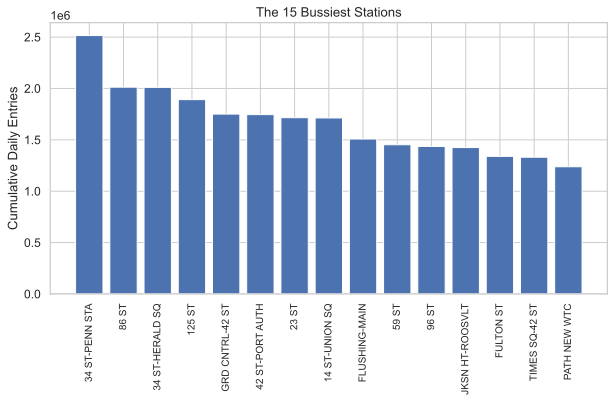

In [423]:
import matplotlib.pyplot as plt 
from matplotlib.figure import Figure

plt.figure(figsize=(10, 5), dpi=80)
plt.bar(x=station_totals['STATION'][:15], height=station_totals['DAILY_ENTRIES'][:15])
plt.xticks(rotation=90, fontsize=10);
plt.ylabel("Cumulative Daily Entries");
plt.title('The 15 Bussiest Stations')
plt.savefig('The 15 Bussiest Stations.png');

# MTA Challenge Pt 3

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

### Problem 7

We will plot the daily time series for a single turnstile.

- Select one turnstile (combination of [`C/A`, `UNIT`, `SCP`, `STATION`])
- Filter your pandas DataFrame so it only represents a single turnstile (make sure that turnstile has entries for multiple days).
- Using matplotlib, create a plot with the days on the X axis and the daily `ENTRIES` *for that turnstile* on the Y axis

You can use the following as a starting point:
```
plt.figure(figsize=(10,3))
plt.plot(<days>,<entries>)
```

In [118]:
station_totals.head()

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,2514983.0
110,86 ST,2012479.0
59,34 ST-HERALD SQ,2010364.0
9,125 ST,1891189.0
233,GRD CNTRL-42 ST,1750697.0


In [121]:
turnstiles_daily.loc[turnstiles_daily['STATION'] == '34 ST-PENN STA']

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
101312,N067,R012,00-00-00,34 ST-PENN STA,02/28/2021,233614,02/27/2021,233504.0,110.0
101313,N067,R012,00-00-00,34 ST-PENN STA,03/01/2021,233787,02/28/2021,233614.0,173.0
101314,N067,R012,00-00-00,34 ST-PENN STA,03/02/2021,233962,03/01/2021,233787.0,175.0
101315,N067,R012,00-00-00,34 ST-PENN STA,03/03/2021,234177,03/02/2021,233962.0,215.0
101316,N067,R012,00-00-00,34 ST-PENN STA,03/04/2021,234373,03/03/2021,234177.0,196.0
...,...,...,...,...,...,...,...,...,...
258337,R142,R293,01-06-01,34 ST-PENN STA,05/10/2021,68072122,05/09/2021,68072008.0,114.0
258338,R142,R293,01-06-01,34 ST-PENN STA,05/11/2021,68072248,05/10/2021,68072122.0,126.0
258339,R142,R293,01-06-01,34 ST-PENN STA,05/12/2021,68072381,05/11/2021,68072248.0,133.0
258340,R142,R293,01-06-01,34 ST-PENN STA,05/13/2021,68072575,05/12/2021,68072381.0,194.0


In [122]:
single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "N067") & 
(turnstiles_daily["UNIT"] == "R012") & 
(turnstiles_daily["SCP"] == "00-00-00") & 
(turnstiles_daily["STATION"] == "34 ST-PENN STA")]

single_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
101312,N067,R012,00-00-00,34 ST-PENN STA,02/28/2021,233614,02/27/2021,233504.0,110.0
101313,N067,R012,00-00-00,34 ST-PENN STA,03/01/2021,233787,02/28/2021,233614.0,173.0
101314,N067,R012,00-00-00,34 ST-PENN STA,03/02/2021,233962,03/01/2021,233787.0,175.0
101315,N067,R012,00-00-00,34 ST-PENN STA,03/03/2021,234177,03/02/2021,233962.0,215.0
101316,N067,R012,00-00-00,34 ST-PENN STA,03/04/2021,234373,03/03/2021,234177.0,196.0


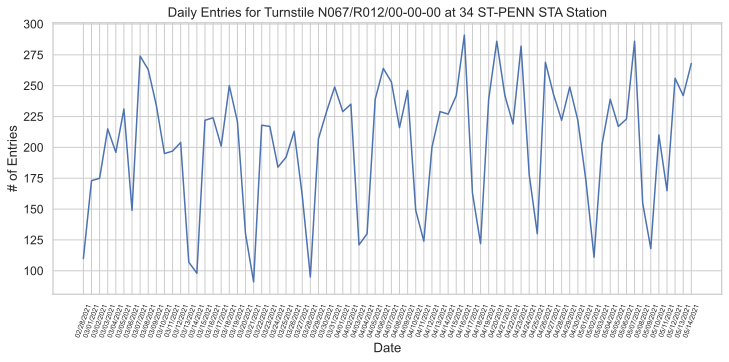

In [424]:
plt.figure(figsize=(12,5));
plt.plot(single_turnstile['DATE'], single_turnstile['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=70, fontsize= 7)
plt.title('Daily Entries for Turnstile N067/R012/00-00-00 at 34 ST-PENN STA Station');
plt.savefig('Daiily entries by a single turnstile.png')

### Problem 8

Plot the daily time series for a station.

In [314]:
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,02/28/2021,3639.0
1,1 AV,03/01/2021,6086.0
2,1 AV,03/02/2021,6254.0
3,1 AV,03/03/2021,6557.0
4,1 AV,03/04/2021,6506.0


In [128]:
station_daily_34_ST = station_daily[station_daily['STATION'] == '34 ST-PENN STA'].copy()
station_daily_34_ST.head()

,STATION,DATE,DAILY_ENTRIES
4636,34 ST-PENN STA,02/28/2021,48143.0
4637,34 ST-PENN STA,03/01/2021,32218.0
4638,34 ST-PENN STA,03/02/2021,32900.0
4639,34 ST-PENN STA,03/03/2021,33891.0
4640,34 ST-PENN STA,03/04/2021,33509.0


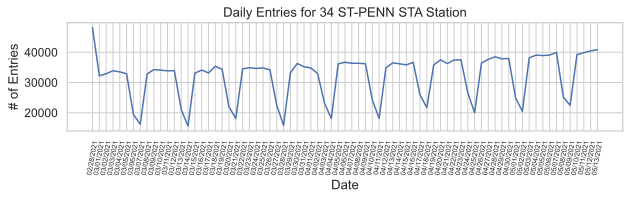

In [426]:
plt.figure(figsize=(10, 2))
plt.plot(station_daily_34_ST['DATE'], station_daily_34_ST['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=80, fontsize= 7)
plt.title('Daily Entries for 34 ST-PENN STA Station');
plt.savefig('Daily Entries for 34 ST-PENN STA Station.png')

### Problem 9

Make a list of counts for **one week** for **one station**: Monday's count, Tuesday's count, etc., so it's a list of 7 counts. Make the same list for all weeks available. 

`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

*Hint: [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek) and [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.isocalendar.html) may prove useful.*

In [136]:
import numpy as np

In [137]:
station_daily_34_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34_ST['DATE']).dt.dayofweek
station_daily_34_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34_ST['DATE']).dt.isocalendar().week
station_daily_34_ST.head()

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
4636,34 ST-PENN STA,02/28/2021,48143.0,6,8
4637,34 ST-PENN STA,03/01/2021,32218.0,0,9
4638,34 ST-PENN STA,03/02/2021,32900.0,1,9
4639,34 ST-PENN STA,03/03/2021,33891.0,2,9
4640,34 ST-PENN STA,03/04/2021,33509.0,3,9


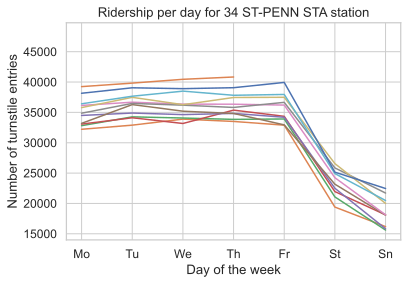

In [428]:
for i, group in station_daily_34_ST.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
  
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 34 ST-PENN STA station')
plt.savefig('Ridership per day for a single turnstile');

In [324]:
#Same analisys for the all stations

station_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily['DATE']).dt.dayofweek
station_daily['WEEK_OF_YEAR'] = pd.to_datetime(station_daily['DATE']).dt.isocalendar().week
station_daily.head()

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
0,1 AV,02/28/2021,3639.0,6,8
1,1 AV,03/01/2021,6086.0,0,9
2,1 AV,03/02/2021,6254.0,1,9
3,1 AV,03/03/2021,6557.0,2,9
4,1 AV,03/04/2021,6506.0,3,9


### Problem 10

Make a single list of these total ridership values (i.e., the daily entries) and plot their histogram with

```
plt.hist(total_ridership_counts)
```

to get an idea about the distribution of total ridership among different stations.

This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

**(Optional)**: If you want to see which stations take the meat of the traffic, sort the total ridership dataframe, and plot station-counts on a `plt.bar` graph. For this, you want to have two lists: the indices of each bar (stations), and the values (entries).

```
# pseudo-code:
plt.bar(x=stations, height=daily_entries)
```

In [237]:
station_totals = station_daily.groupby('STATION')['DAILY_ENTRIES'].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)

station_totals.head(15)


,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,2514983.0
110,86 ST,2012479.0
59,34 ST-HERALD SQ,2010364.0
9,125 ST,1891189.0
233,GRD CNTRL-42 ST,1750697.0
68,42 ST-PORT AUTH,1745461.0
46,23 ST,1715344.0
14,14 ST-UNION SQ,1712995.0
217,FLUSHING-MAIN,1507715.0
85,59 ST,1452051.0


In [258]:
station_totals.shape

(378, 2)

In [242]:
bussiest_stations = station_totals.groupby('STATION')['DAILY_ENTRIES'].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)



,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,2514983.0
110,86 ST,2012479.0
59,34 ST-HERALD SQ,2010364.0
9,125 ST,1891189.0
233,GRD CNTRL-42 ST,1750697.0
...,...,...
353,TOMPKINSVILLE,19306.0
332,ROCKAWAY PARK B,17003.0
148,BEACH 98 ST,8820.0
162,BROAD CHANNEL,7338.0


In [399]:
Top_station = bussiest_stations.head(15)

In [406]:
Top_station

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,2514983.0
110,86 ST,2012479.0
59,34 ST-HERALD SQ,2010364.0
9,125 ST,1891189.0
233,GRD CNTRL-42 ST,1750697.0
68,42 ST-PORT AUTH,1745461.0
46,23 ST,1715344.0
14,14 ST-UNION SQ,1712995.0
217,FLUSHING-MAIN,1507715.0
85,59 ST,1452051.0


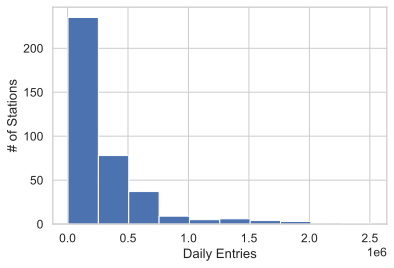

In [429]:
plt.hist(station_totals['DAILY_ENTRIES'])
plt.xlabel('Daily Entries')
plt.ylabel('# of Stations')
plt.savefig('Daily entries by # of stations');

View top fifteen stations

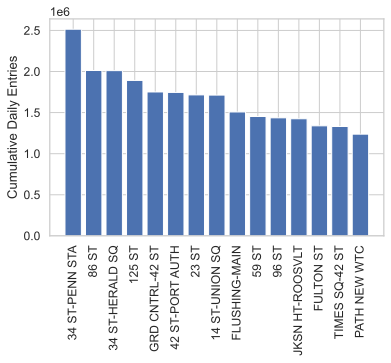

In [430]:
plt.bar(x=station_totals['STATION'][:15], height=station_totals['DAILY_ENTRIES'][:15])
plt.xticks(rotation=90);
plt.ylabel("Cumulative Daily Entries")
plt.savefig('Cumulative Daily Entries');

# Other sources

In [446]:
#https://www.kaggle.com/muonneutrino/mapping-new-york-city-census-data#Income-in-New-York-City
#https://www1.nyc.gov/site/doh/covid/covid-19-data.page
#https://data.cityofnewyork.us/browse?category=Health&q=covid
#https://new.mta.info/coronavirus/popup-vaccination-stations # No data, only informative

In [165]:
#Additional dataset download

stations_by_zipcode = pd.read_csv('/Users/hernantrujillo/Documents/Metis/NBM_EDA_Student/station_totals_zipcode.csv')
nyborough_by_income = pd.read_csv('/Users/hernantrujillo/Documents/Metis/NBM_EDA_Student/nyc_census_tracts.csv')
ny_socioeconomic_groups = pd.read_csv('/Users/hernantrujillo/Documents/Metis/NBM_EDA_Student/by-poverty.csv')
ny_general_data = pd.read_csv('/Users/hernantrujillo/Documents/Metis/NBM_EDA_Student/data-by-modzcta.csv')

In [166]:
#Dropping unnecesary data
stations_by_zipcode.drop(columns=['DAILY_ACTIVITY'], inplace=True)

# Income analysis

In [167]:
nyborough_by_income.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [196]:
null_columns = nyborough_by_income.columns[nyborough_by_income.isnull().any()]
nyborough_by_income[null_columns].isnull().sum()


Income    66
dtype: int64

In [198]:
nyborough_by_income.head()

,County,Borough,TotalPop,Income
0,Bronx,Bronx,7703,NaN
1,Bronx,Bronx,5403,72034.0
2,Bronx,Bronx,5915,74836.0
3,Bronx,Bronx,5879,32312.0
4,Bronx,Bronx,2591,37936.0


In [193]:
#Let's drop more columns we don't need 
nyborough_by_income.drop(columns=['CensusTract', 'Men', 'Women', 'Citizen', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'Employed'], inplace=True)

In [194]:
nyborough_by_income

,County,Borough,TotalPop,Income
0,Bronx,Bronx,7703,NaN
1,Bronx,Bronx,5403,72034.0
2,Bronx,Bronx,5915,74836.0
3,Bronx,Bronx,5879,32312.0
4,Bronx,Bronx,2591,37936.0
...,...,...,...,...
2162,Richmond,Staten Island,6279,76542.0
2163,Richmond,Staten Island,2550,25064.0
2164,Richmond,Staten Island,4611,22656.0
2165,Richmond,Staten Island,1131,56406.0


In [195]:
#Let's see how many null values we still have in the columns we really need
null_columns2 = nyborough_by_income.columns[nyborough_by_income.isnull().any()]
nyborough_by_income[null_columns2].isnull().sum()

Income    66
dtype: int64

In [181]:
#Now, we don't have null values anymore.
#null_columns3 = nyborough_by_income2.columns[nyborough_by_income2.isnull().any()]
#nyborough_by_income2[null_columns3].isnull().sum()

Series([], dtype: float64)

In [201]:
#Since null values represents only about 3% of our dataset we will replace them with an average (mean)
nyborough_by_income = nyborough_by_income.fillna(nyborough_by_income.mean())


In [203]:
null_columns2 = nyborough_by_income.columns[nyborough_by_income.isnull().any()]
nyborough_by_income[null_columns2].isnull().sum()

Series([], dtype: float64)

In [251]:
m = nyborough_by_income2.groupby(['Borough'])[['Income']].apply(np.median).reset_index()
m.columns = ["Borough", "Median_Income"]
m

,Borough,Median_Income
0,Bronx,33785.0
1,Brooklyn,49125.0
2,Manhattan,76154.0
3,Queens,60319.0
4,Staten Island,74891.5


In [267]:
nyborough_by_income.Borough.unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [252]:
#Merge to add Median Income

nyborough_by_income2 = pd.merge(nyborough_by_income2, m,  how='inner', on=['Borough'])
nyborough_by_income2

,County,Borough,TotalPop,Income,Median_Income
0,Bronx,Bronx,7703,59101.3208,33785.0
1,Bronx,Bronx,5403,72034.0000,33785.0
2,Bronx,Bronx,5915,74836.0000,33785.0
3,Bronx,Bronx,5879,32312.0000,33785.0
4,Bronx,Bronx,2591,37936.0000,33785.0
...,...,...,...,...,...
2162,Richmond,Staten Island,6279,76542.0000,74891.5
2163,Richmond,Staten Island,2550,25064.0000,74891.5
2164,Richmond,Staten Island,4611,22656.0000,74891.5
2165,Richmond,Staten Island,1131,56406.0000,74891.5


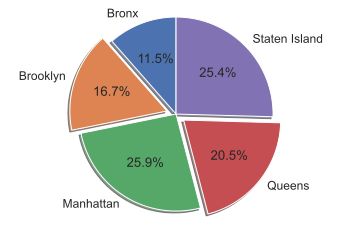

<Figure size 432x288 with 0 Axes>

In [447]:


labels = 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'
sizes = [33785, 49125, 76154, 60319, 74891]
explode = (0, 0.1, 0, 0.1, 0)  # only "explode" the 4th slice (i.e. 'Queens')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
plt.savefig('Median Income by Borough')

In [256]:
# Medium Poverty = Brooklyn and Queen are the most affected boroughs with a high rate of cases
nyborough_by_income2.Borough.unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [233]:
#Merge on 2 tables by using the zip code

general_data_stations_zip = pd.merge(ny_general_data, stations_by_zipcode,  how='inner', left_on=['MODIFIED_ZCTA'], right_on = ['ZIPCODE'])
general_data_stations_zip

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,label,lat,lon,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,STATION,ZIPCODE
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",40.750693,-73.997137,1602,5801.60,27613.09,35,126.75,7.68,21510,34 ST-PENN STA,10001
1,10001,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",40.750693,-73.997137,1602,5801.60,27613.09,35,126.75,7.68,21510,34 ST-HERALD SQ,10001
2,10001,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",40.750693,-73.997137,1602,5801.60,27613.09,35,126.75,7.68,21510,34 ST-HUDSON YD,10001
3,10002,Chinatown/Lower East Side,Manhattan,10002,40.715781,-73.986176,6078,8069.28,75322.71,280,371.73,12.48,50513,GRAND ST,10002
4,10002,Chinatown/Lower East Side,Manhattan,10002,40.715781,-73.986176,6078,8069.28,75322.71,280,371.73,12.48,50513,DELANCEY/ESSEX,10002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,11693,Arverne/Broad Channel,Queens,11693,40.603699,-73.821926,1139,8988.22,12672.14,39,307.76,15.74,7435,BROAD CHANNEL,11693
363,11694,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,40.577599,-73.844553,2272,10933.91,20779.40,96,462.00,16.50,14269,FAR ROCKAWAY,11694
364,11694,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,40.577599,-73.844553,2272,10933.91,20779.40,96,462.00,16.50,14269,ROCKAWAY PARK B,11694
365,11694,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,40.577599,-73.844553,2272,10933.91,20779.40,96,462.00,16.50,14269,BEACH 98 ST,11694


In [232]:
#No null values! we're good
null_columns4 = general_data_stations_zip.columns[general_data_stations_zip.isnull().any()]
general_data_stations_zip[null_columns4].isnull().sum()

Series([], dtype: float64)

In [287]:
#Another Merge on 2 tables by using the Station to incorporate Daily_Entries

general_data_stations_zip_entries = pd.merge(general_data_stations_zip, station_totals,  how='inner', on=['STATION'])
general_data_stations_zip_entries

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,label,lat,lon,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,STATION,ZIPCODE,DAILY_ENTRIES
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",40.750693,-73.997137,1602,5801.60,27613.09,35,126.75,7.68,21510,34 ST-PENN STA,10001,2514983.0
1,10001,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",40.750693,-73.997137,1602,5801.60,27613.09,35,126.75,7.68,21510,34 ST-HERALD SQ,10001,2010364.0
2,10001,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",40.750693,-73.997137,1602,5801.60,27613.09,35,126.75,7.68,21510,34 ST-HUDSON YD,10001,392779.0
3,10002,Chinatown/Lower East Side,Manhattan,10002,40.715781,-73.986176,6078,8069.28,75322.71,280,371.73,12.48,50513,GRAND ST,10002,694169.0
4,10002,Chinatown/Lower East Side,Manhattan,10002,40.715781,-73.986176,6078,8069.28,75322.71,280,371.73,12.48,50513,DELANCEY/ESSEX,10002,572765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,11693,Arverne/Broad Channel,Queens,11693,40.603699,-73.821926,1139,8988.22,12672.14,39,307.76,15.74,7435,BROAD CHANNEL,11693,7338.0
363,11694,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,40.577599,-73.844553,2272,10933.91,20779.40,96,462.00,16.50,14269,FAR ROCKAWAY,11694,133988.0
364,11694,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,40.577599,-73.844553,2272,10933.91,20779.40,96,462.00,16.50,14269,ROCKAWAY PARK B,11694,17003.0
365,11694,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,40.577599,-73.844553,2272,10933.91,20779.40,96,462.00,16.50,14269,BEACH 98 ST,11694,8820.0


In [244]:
bussiest_stations = station_daily.groupby('STATION')['DAILY_ENTRIES'].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)

station_totals.head(15)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,2514983.0
110,86 ST,2012479.0
59,34 ST-HERALD SQ,2010364.0
9,125 ST,1891189.0
233,GRD CNTRL-42 ST,1750697.0
68,42 ST-PORT AUTH,1745461.0
46,23 ST,1715344.0
14,14 ST-UNION SQ,1712995.0
217,FLUSHING-MAIN,1507715.0
85,59 ST,1452051.0


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


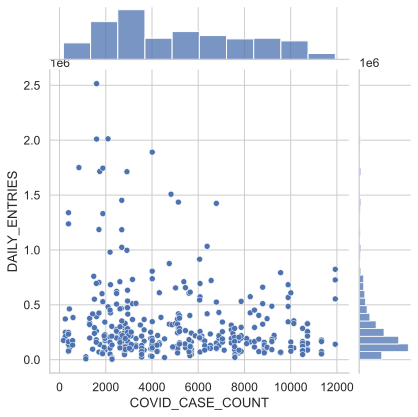

In [422]:
import seaborn as sns
#sns.axes_style('white')
#sns.jointplot("COVID_CASE_COUNT", "DAILY_ENTRIES", data=general_data_stations_zip_entries, kind='hex', alpha=0.8);

sns.jointplot("COVID_CASE_COUNT", "DAILY_ENTRIES", data=general_data_stations_zip_entries);

In [290]:
Covid_cases_borough = general_data_stations_zip_entries.groupby('BOROUGH_GROUP')['COVID_CASE_COUNT'].sum() \
    .reset_index() \
    .sort_values('COVID_CASE_COUNT', ascending=False)

Covid_cases_borough.head()

,BOROUGH_GROUP,COVID_CASE_COUNT
1,Brooklyn,767134
0,Bronx,428309
3,Queens,406091
2,Manhattan,256413
4,Staten Island,9086


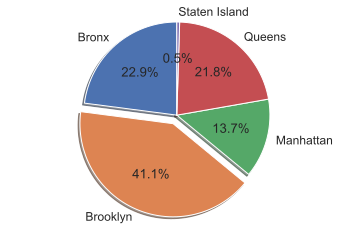

<Figure size 432x288 with 0 Axes>

In [432]:
#Plot Covid_cases_borough

BOROUGH_GROUP = 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'
COVID_CASE_COUNT = [428309, 767134, 256413, 406091, 9086]
explode = (0.0, 0.1, 0.0, 0.0, 0.0)  # only "explode" the 4th slice (i.e. 'Queens')

fig1, ax1 = plt.subplots()
ax1.pie(COVID_CASE_COUNT, explode=explode, labels=BOROUGH_GROUP, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
plt.savefig('Covid cases by borough')

In [299]:
Stations_Vaccination_Plan = general_data_stations_zip_entries.groupby(["STATION", "BOROUGH_GROUP", "COVID_CASE_COUNT"])[['DAILY_ENTRIES']].sum().reset_index()
Stations_Vaccination_Plan.head(10)


,STATION,BOROUGH_GROUP,COVID_CASE_COUNT,DAILY_ENTRIES
0,1 AV,Manhattan,2916,474055.0
1,103 ST,Manhattan,6558,721660.0
2,103 ST-CORONA,Queens,11929,726821.0
3,104 ST,Queens,3553,129430.0
4,110 ST,Manhattan,5142,285375.0
5,111 ST,Queens,11929,553744.0
6,116 ST,Manhattan,4010,806327.0
7,116 ST-COLUMBIA,Manhattan,4010,172452.0
8,121 ST,Queens,4217,74628.0
9,125 ST,Manhattan,4010,1891189.0


In [448]:
Final_Stations = general_data_stations_zip_entries.groupby(["STATION", "BOROUGH_GROUP", 'DAILY_ENTRIES'])[["COVID_CASE_COUNT"]].sum().reset_index().sort_values('COVID_CASE_COUNT', ascending=False)
Final_Stations.head(10)


,STATION,BOROUGH_GROUP,DAILY_ENTRIES,COVID_CASE_COUNT
2,103 ST-CORONA,Queens,726821.0,11929
5,111 ST,Queens,553744.0,11929
273,METS-WILLETS PT,Queens,140796.0,11929
254,JUNCTION BLVD,Queens,823644.0,11929
130,AVENUE N,Brooklyn,73514.0,11333
129,AVENUE M,Brooklyn,164859.0,11333
128,AVENUE J,Brooklyn,179251.0,11333
127,AVENUE I,Brooklyn,52197.0,11333
126,AVENUE H,Brooklyn,55115.0,11333
279,MOSHOLU PKWY,Bronx,256983.0,10726


In [298]:
Final_Stations.shape

(367, 4)

In [300]:
#Even though the bussiest stations present more traffic when we filter down the Final_Stations dataframe, we can notice that this stations don't match with the more affected boroughs in NY so we can conclude  
Covid_traffic = Final_Stations.groupby(["STATION", "BOROUGH_GROUP", "COVID_CASE_COUNT"])[['DAILY_ENTRIES']].sum().reset_index().sort_values('DAILY_ENTRIES', ascending=False)
Covid_traffic.head(10)

,STATION,BOROUGH_GROUP,COVID_CASE_COUNT,DAILY_ENTRIES
61,34 ST-PENN STA,Manhattan,1602,2514983.0
109,86 ST,Manhattan,2098,2012479.0
59,34 ST-HERALD SQ,Manhattan,1602,2010364.0
9,125 ST,Manhattan,4010,1891189.0
231,GRD CNTRL-42 ST,Manhattan,840,1750697.0
68,42 ST-PORT AUTH,Manhattan,1875,1745461.0
46,23 ST,Manhattan,1741,1715344.0
14,14 ST-UNION SQ,Manhattan,2916,1712995.0
215,FLUSHING-MAIN,Queens,4823,1507715.0
84,59 ST,Manhattan,2693,1452051.0


In [438]:
from ipywidgets import interactive
def size_widget(height=2.5, aspect=1):
         sns.pairplot(Covid_traffic, hue='BOROUGH_GROUP', height=4, vars=['COVID_CASE_COUNT', 'DAILY_ENTRIES'])
         plt.savefig('Correlation Covid Cases vs Daily Entries');

In [439]:
interactive(size_widget, height=(1, 3.5, 0.5), aspect=(0.5, 2, 0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

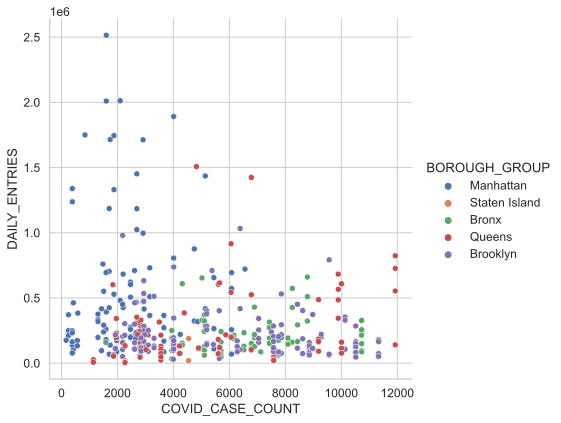

In [445]:
sns.pairplot(general_data_stations_zip_entries, 
             hue='BOROUGH_GROUP', 
             y_vars=['DAILY_ENTRIES'],
             x_vars=['COVID_CASE_COUNT'],
             height=6)
plt.savefig('Correlation Covid Cases vs Daily_Entries')             